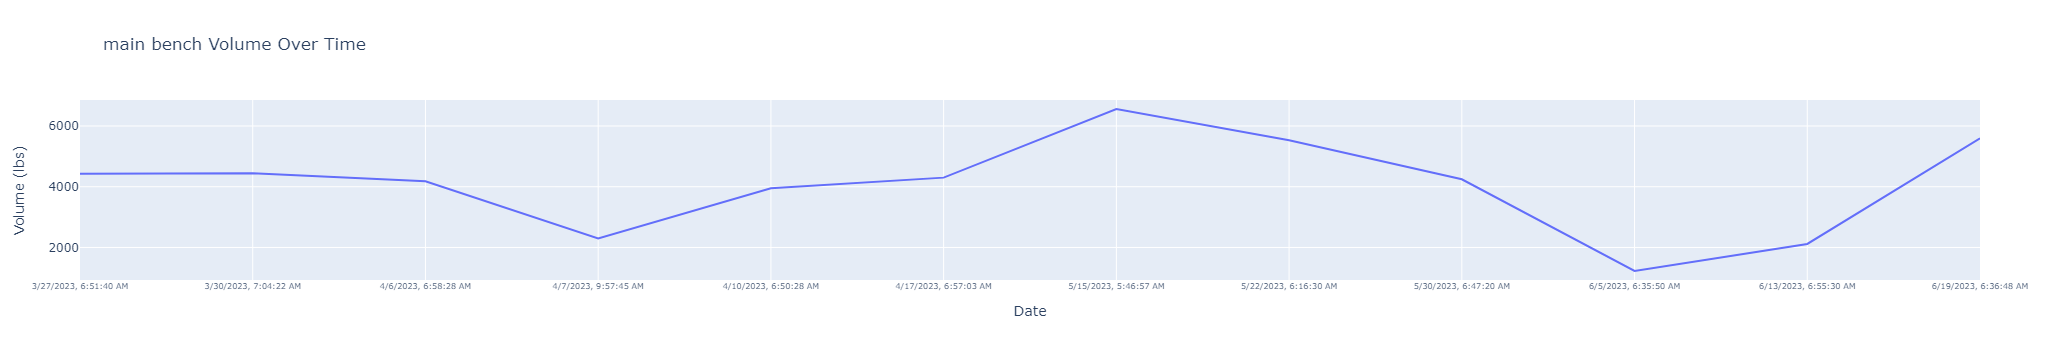

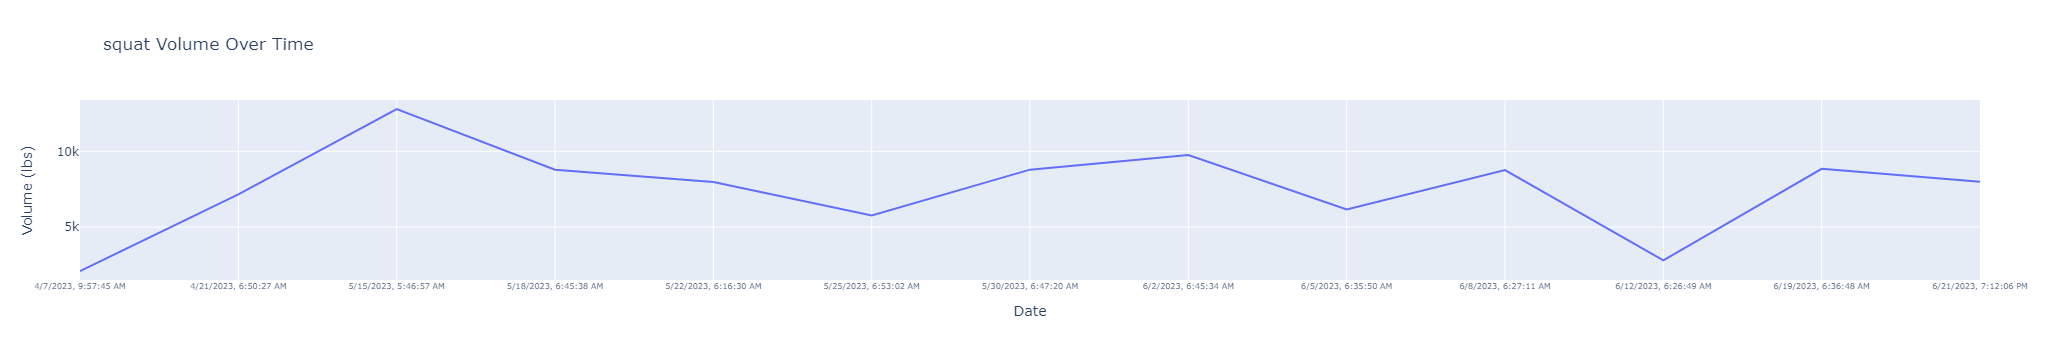

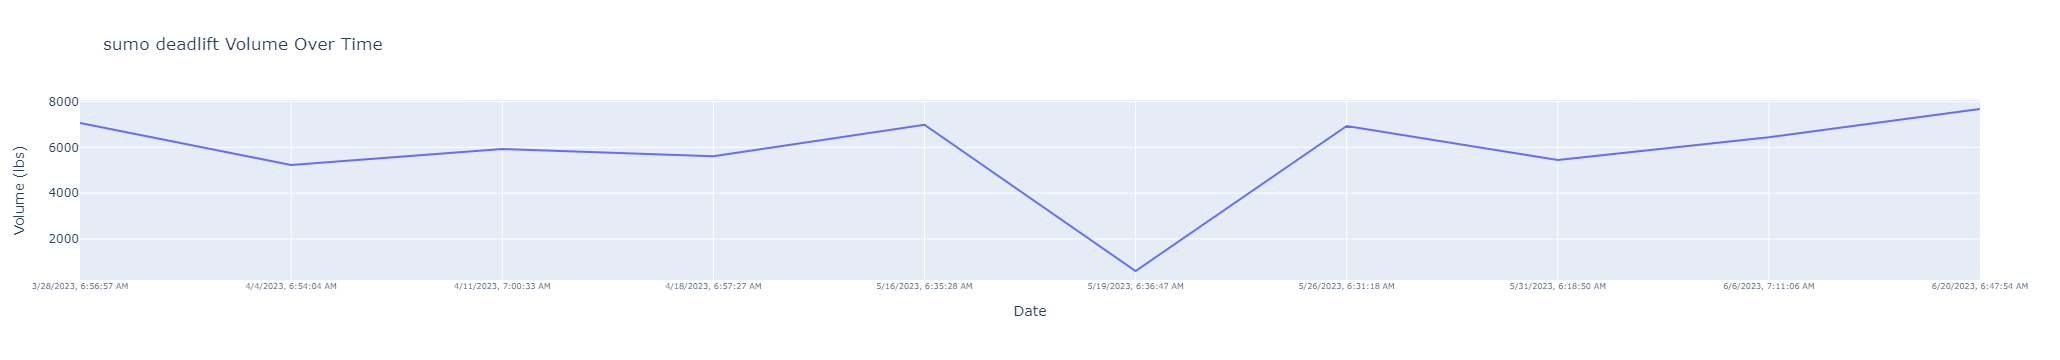

In [176]:
import pandas as pd
import seaborn as sb
from datetime import datetime
from dateutil.relativedelta import relativedelta
pd.options.mode.chained_assignment = None  # default='warn'
import plotly.express as px
test_data = 'repone.csv'
import plotly.express as px

df = pd.read_csv(test_data)

def plotVolumeOverTime(df,exercise,startDate):
    ex = df.loc[df['Exercise'] == exercise]
    exDays = pd.unique(ex['Workout Start Time'])
   
    daysToAnalyze = []
    for day in exDays:
        datetime_object = datetime.strptime(day, '%m/%d/%Y, %H:%M:%S %p')
        if datetime_object >= startDate:
            daysToAnalyze.append(day)
    volumes = []
    for date in daysToAnalyze:
        day = ex.loc[ex['Workout Start Time'] == date]
        day['Weight'] = day['Weight'].str.strip('-')
        day['Weight'] = pd.to_numeric(day['Weight'])
        sums = day.sum(numeric_only=True)
        volumes.append(sums['Weight'])
    fig = px.line(df, x=daysToAnalyze, y=volumes, title=exercise+' Volume Over Time')
    fig.update_layout(
        xaxis_title="Date", yaxis_title="Volume (lbs)"
    )
    fig.update_xaxes(tickfont_size=8)
    fig.show()

startDate = datetime.now() - relativedelta(months=3)
plotVolumeOverTime(df,'main bench',startDate)
plotVolumeOverTime(df,'squat',startDate)
plotVolumeOverTime(df,'sumo deadlift',startDate)
    

   



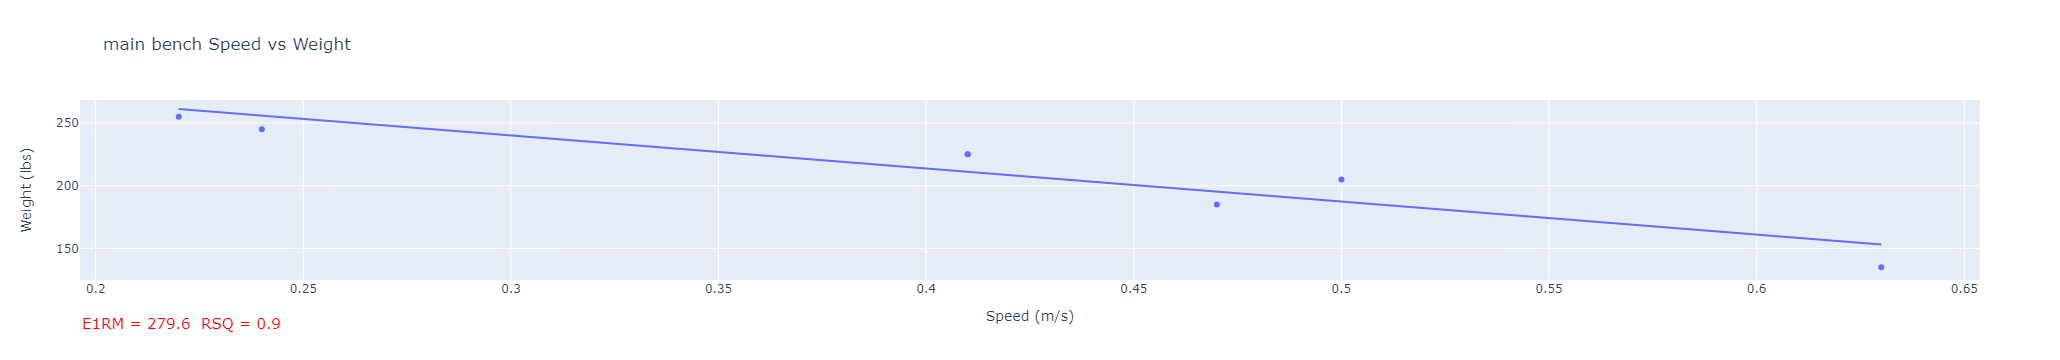

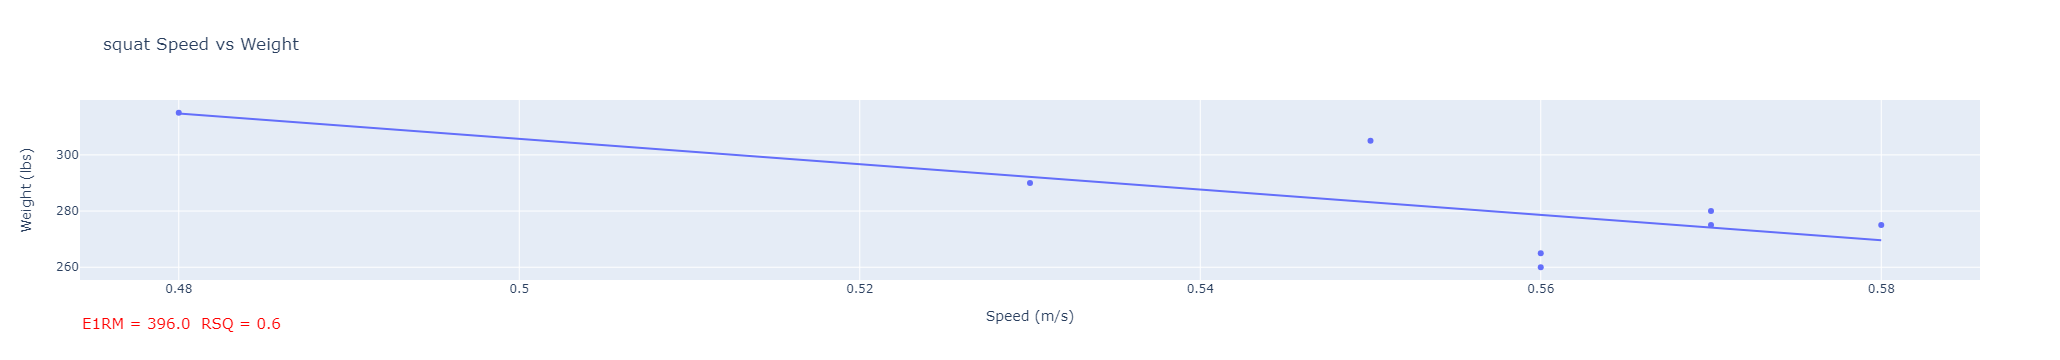

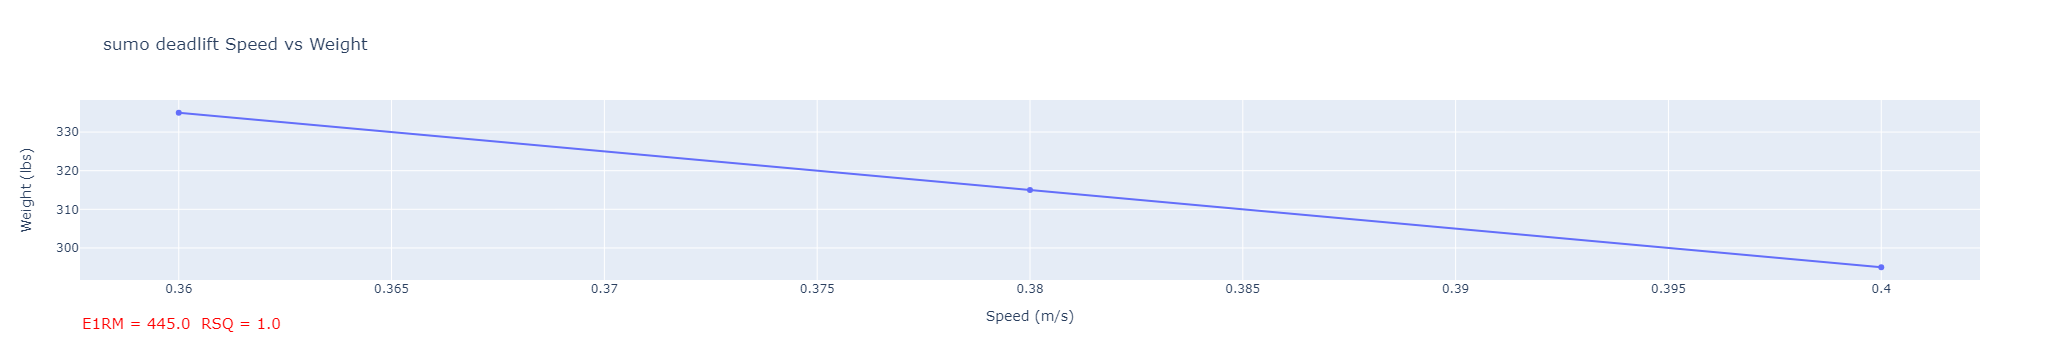

In [177]:
def plotSpeedVsWeight(df,exercise,startDate, minSpeed):
    ex = df.loc[df['Exercise'] == exercise]
    exDays = pd.unique(ex['Workout Start Time'])
    daysToAnalyze = []
    for day in exDays:
        datetime_object = datetime.strptime(day, '%m/%d/%Y, %H:%M:%S %p')
        if datetime_object >= startDate:
            daysToAnalyze.append(day)
    
    weights = []
    speeds = []
    for date in daysToAnalyze:
        day = ex.loc[ex['Workout Start Time'] == date]
        day['Weight'] = day['Weight'].str.strip('-')
        day['Weight'] = pd.to_numeric(day['Weight'])
        unqWeights = pd.unique(day['Weight'])
        for weight in unqWeights:
            reps = day.loc[day['Weight'] == weight]
            maxVelocity = reps.max(numeric_only=True)['Avg Velocity (m/s)']
            weights.append(weight)
            speeds.append(maxVelocity)
        
    fig = px.scatter(df, x=speeds, y=weights, title=exercise+' Speed vs Weight',trendline="ols") 
    fig.update_layout(
    xaxis_title="Speed (m/s)", yaxis_title="Weight (lbs)")
    results = px.get_trendline_results(fig)
   
    b = results.iloc[0]["px_fit_results"].params[0]
    m  = results.iloc[0]["px_fit_results"].params[1]
    rsq = results.iloc[0]["px_fit_results"].rsquared
    
    e1RM = m*minSpeed + b
    fig.add_annotation(dict(font=dict(color='red',size=15),
                                        x=0,
                                        y=-0.3,
                                        showarrow=False,
                                        text= f"E1RM = {e1RM:.1f}"+"  "+ f"RSQ = {rsq:.1f}",
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
    

    fig.show()

startDate = datetime.now() - relativedelta(days=15)
plotSpeedVsWeight(df,'main bench', startDate, 0.15)
plotSpeedVsWeight(df,'squat',startDate, 0.3)
plotSpeedVsWeight(df,'sumo deadlift',startDate, 0.25)
    

    
